# Understanding the processor connectivity graph

There are two `.csv` files created to export both the transistors and their interconnections.

- [`transistors.csv`](https://s3-us-west-2.amazonaws.com/ericmjonas-public/data/neuroproc/transistors.csv) describes the transistors, their locations, and what wires they are connected to. 
- [`wires.csv`](https://s3-us-west-2.amazonaws.com/ericmjonas-public/data/neuroproc/wires.csv) describes the wires and canonical names for the wires

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
sns.set(style="white", context="talk")

Populating the interactive namespace from numpy and matplotlib


## Transistors

In [2]:
!wget -N https://s3-us-west-2.amazonaws.com/ericmjonas-public/data/neuroproc/transistors.csv

--2017-01-02 13:11:25--  https://s3-us-west-2.amazonaws.com/ericmjonas-public/data/neuroproc/transistors.csv
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 54.231.168.248
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|54.231.168.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245130 (239K) [text/csv]
Server file no newer than local file ‘transistors.csv’ -- not retrieving.



In [3]:
transistors_df = pd.read_csv("transistors.csv")
transistors_df.head()

,bb,c1,c2,gate,name,on,x,y,pos
0,"[1450, 1510, 5143, 5320]",558,217,357,t0,False,1480.0,5231.5,0
1,"[5424, 5629, 548, 922]",657,349,1608,t1,False,5526.5,735.0,1
2,"[3867, 3899, 2465, 2642]",558,1146,412,t2,False,3883.0,2553.5,2
3,"[7907, 7990, 9237, 9311]",558,943,558,t3,False,7948.5,9274.0,3
4,"[1893, 1910, 530, 927]",230,657,826,t4,False,1901.5,728.5,4


In [4]:
len(transistors_df)

3510

The fields are as follows:
- `bb` : The bounding box for this transistor on the chip
- `c1` : net id for connection to c1 terminal (drain or source)
- `c2` : net id for connection to c2 terminal (drain or source)
- `gate` : net id for connection to gate
- `name` : a canonical name for this transistor
- `x` : center of transistor, x
- `y` : center of transistor, y


(0, 9000)

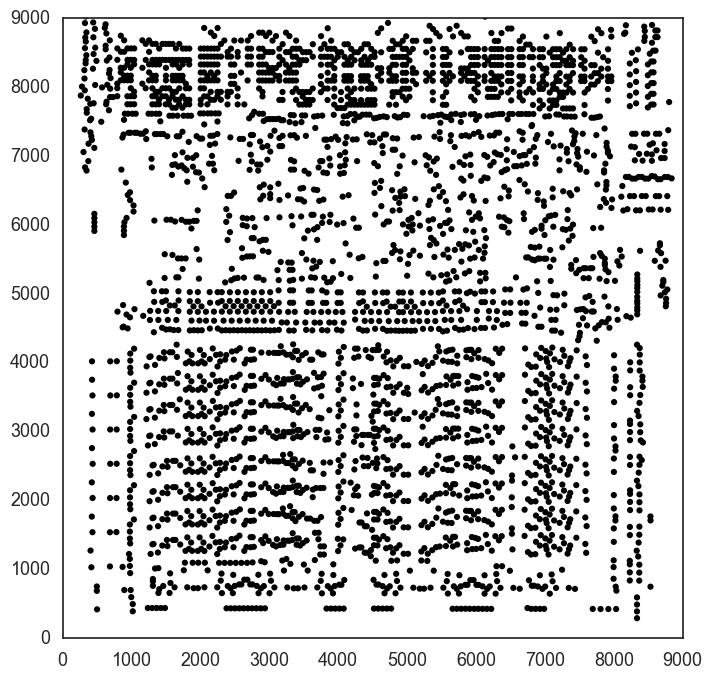

In [5]:
# plot transistor locations
pylab.figure(figsize=(8, 8))
pylab.scatter(transistors_df.x, transistors_df.y, c='k', edgecolor='none')
pylab.xlim(0, 9000)
pylab.ylim(0, 9000)
#pylab.axes().set_aspect('equal', 'datalim')

## Wires (nets)

In [6]:
!wget -N https://s3-us-west-2.amazonaws.com/ericmjonas-public/data/neuroproc/wires.csv

--2017-01-02 13:11:26--  https://s3-us-west-2.amazonaws.com/ericmjonas-public/data/neuroproc/wires.csv
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 54.231.168.248
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|54.231.168.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30249 (30K) [text/csv]
Remote file is newer, retrieving.

--2017-01-02 13:11:26--  https://s3-us-west-2.amazonaws.com/ericmjonas-public/data/neuroproc/wires.csv
Reusing existing connection to s3-us-west-2.amazonaws.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 30249 (30K) [text/csv]
Saving to: ‘wires.csv’

100%[======================================>] 30,249      --.-K/s   in 0.05s   

2017-01-02 13:11:26 (621 KB/s) - ‘wires.csv’ saved [30249/30249]



In [7]:
wires_df = pd.read_csv("wires.csv").fillna("") # fillna to fill empty names with empty string
wires_df.head()

,wireid,c1c2s,gates,pullup,name
0,0,8,4,True,op-T5-rts
1,1,2,1,False,x2
2,2,2,0,False,
3,3,4,0,True,
4,4,8,1,True,op-T0-tay


The fields are as follows:
- `wireid` : the ID of this net, referenced from `transistors.csv`
- `c1c2s` : how many c1 and c2 terminals are connected to this net
- `gates` : how many gates are connected to this net
- `pullup` : Is this a pullup net? 
- `name` : a canonical name for this wire. This is how you can find the clock, etc. 

In [8]:
# let's look at all transistors which have clock on their gate
cclk = wires_df[wires_df.name == "cclk"].iloc[0]
cclk

wireid      943
c1c2s         6
gates       273
pullup    False
name       cclk
Name: 932, dtype: object

In [9]:
trans_clocked = transistors_df[transistors_df.gate == cclk.wireid]

(0, 9000)

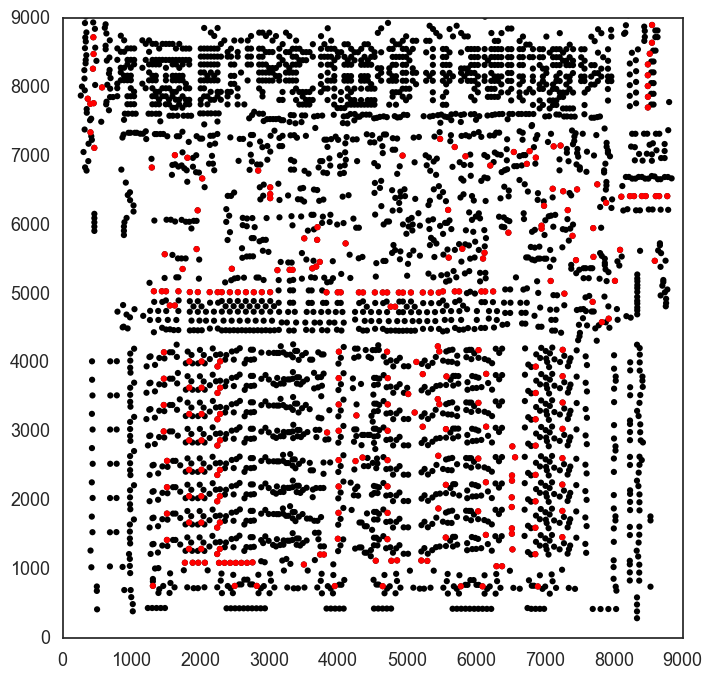

In [10]:
# plot transistor locations
pylab.figure(figsize=(8, 8))
pylab.scatter(transistors_df.x, transistors_df.y, c='k', edgecolor='none')
pylab.scatter(trans_clocked.x, trans_clocked.y, c='r', edgecolor='none')

pylab.xlim(0, 9000)
pylab.ylim(0, 9000)
#pylab.axes().set_aspect('equal', 'datalim')
